<a href="https://colab.research.google.com/github/venkatagovindneelapu/TelecomChurmPrediction/blob/main/Telecom_Churm_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📦 Import Libraries and Load Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import chi2_contingency, ttest_ind

In [ ]:
# Load dataset
df = pd.read_csv('/content/Churn_Prediction_dataset.csv')
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


# **🧹  Data Cleaning and Preprocessing**

In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check missing values
print(df.isnull().sum())

# Drop rows with null TotalCharges
df.dropna(inplace=True)

# Drop customerID
df.drop(columns=['customerID'], inplace=True)

# Encode categorical variables
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64


,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,0,1,2,29.85,29.85,0,0,0,1,0,1,0,0,2,0,0,0,0
1,34,1,1,0,3,56.95,1889.50,0,1,0,0,0,0,0,2,0,2,0,0,0
2,2,1,0,1,3,53.85,108.15,1,1,0,0,0,0,0,2,2,0,0,0,0
3,45,0,1,0,0,42.30,1840.75,0,1,0,0,0,1,0,2,0,2,2,0,0
4,2,1,0,1,2,70.70,151.65,1,0,0,0,0,0,1,0,0,0,0,0,0


# **Exploratory Data Analysis (EDA)**

*   Univariate Analysis
*   Bivariate Analysis
*   Correlation Heatmap



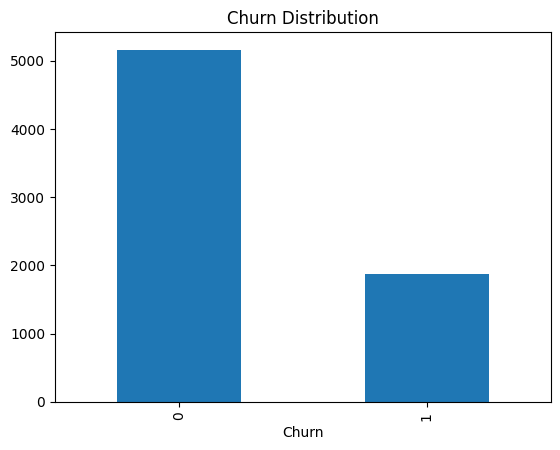

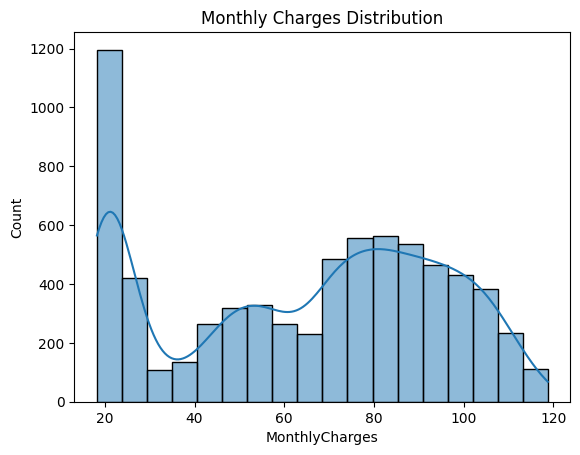

In [ ]:
###Univariate Analysis
df['Churn'].value_counts().plot(kind='bar', title='Churn Distribution')
plt.show()

# Histogram of Monthly Charges
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Monthly Charges Distribution')
plt.show()

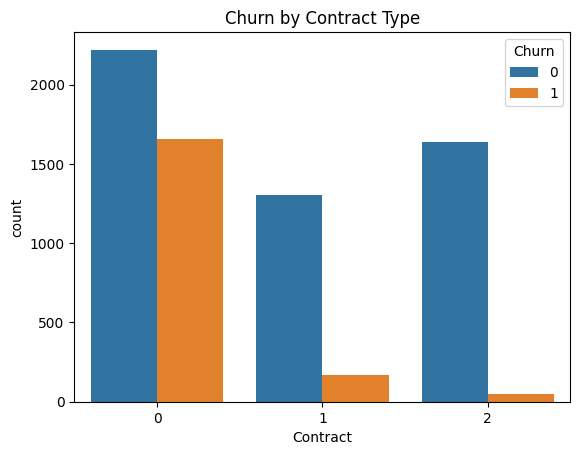

In [ ]:
###Bivariate Analysis
# Churn vs Contract
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()

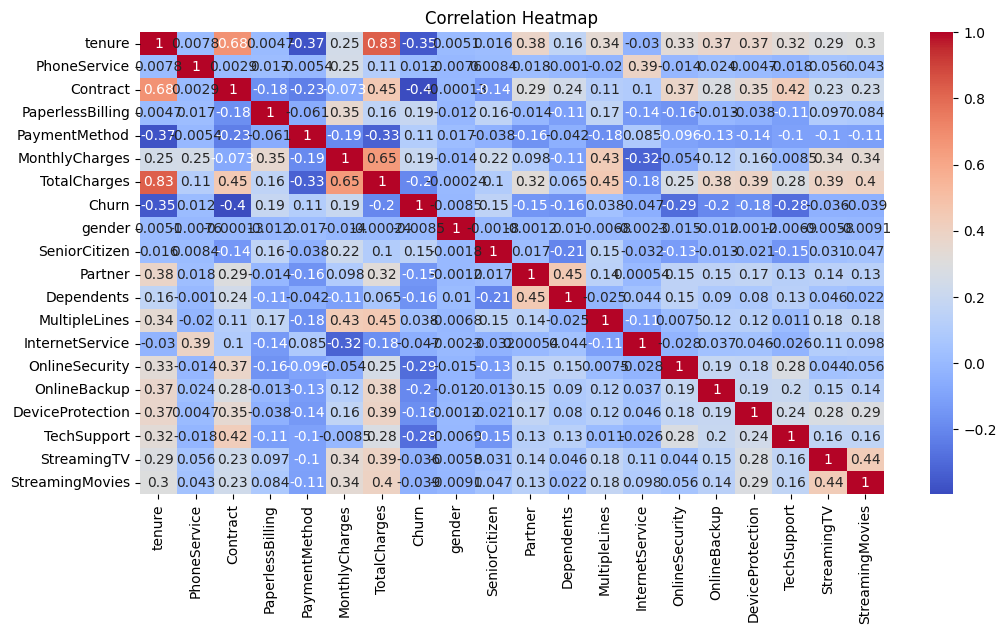

In [ ]:
###Correlation Heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Statistical Analysis**

*   Chi-Square Test: Churn vs Contract
*   t-Test: MonthlyCharges vs Churn
*   A/B Testing Simulation


In [ ]:
###Chi-Square Test: Churn vs Contract

contingency_table = pd.crosstab(df['Churn'], df['Contract'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}")


Chi2: 1179.080956754422, p-value: 9.243221963845809e-257


In [ ]:
###t-Test: MonthlyCharges vs Churn

churn_yes = df[df['Churn'] == 1]['MonthlyCharges']
churn_no = df[df['Churn'] == 0]['MonthlyCharges']
t_stat, p_val = ttest_ind(churn_yes, churn_no)
print(f"T-statistic: {t_stat}, p-value: {p_val}")

T-statistic: 16.491420867045246, p-value: 5.601820072902568e-60


In [ ]:
##A/B Testing Simulation

contract_0 = df[df['Contract'] == 0]['Churn']  # e.g. Month-to-month
contract_1 = df[df['Contract'] == 1]['Churn']  # e.g. One year
print("Churn Rate Contract 0:", contract_0.mean()*100)
print("Churn Rate Contract 1:", contract_1.mean()*100)

Churn Rate Contract 0: 42.70967741935484
Churn Rate Contract 1: 11.277173913043478


# **Machine Learning Models**

*   Logistic Regression
*   Decision Tree Classifier
*   Random Forest Classifier
*   Support Vector Machine

In [ ]:
###Data Splitting & Scaling
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
###Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1024
           1       0.64      0.51      0.56       383

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
###Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))

Decision Tree
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1024
           1       0.50      0.50      0.50       383

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.73      0.73      0.73      1407



In [ ]:
###Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1024
           1       0.65      0.47      0.55       383

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.77      0.79      0.77      1407



In [ ]:
###Support Vector Machine

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM")
print(classification_report(y_test, y_pred_svm))

SVM
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1024
           1       0.68      0.48      0.56       383

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.78      0.80      0.78      1407



# **ROC Curve Comparison**

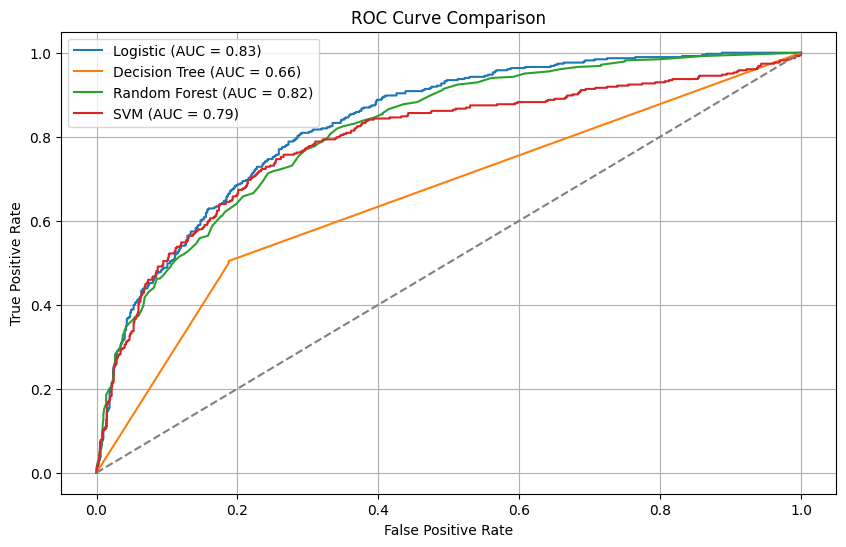

In [ ]:
models = {'Logistic': lr, 'Decision Tree': dt, 'Random Forest': rf, 'SVM': svm}
plt.figure(figsize=(10,6))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()
